In [1]:
import os
import numpy as np
import pandas as pd
from datetime import datetime,time
import utils as u
import signals
from tqdm import tqdm

### Signal data 

In [2]:
signal = signals.signal_analysis(t=time(1,30,0), min_peak_change=0.98)

100%|██████████| 102/102 [00:28<00:00,  3.56it/s]


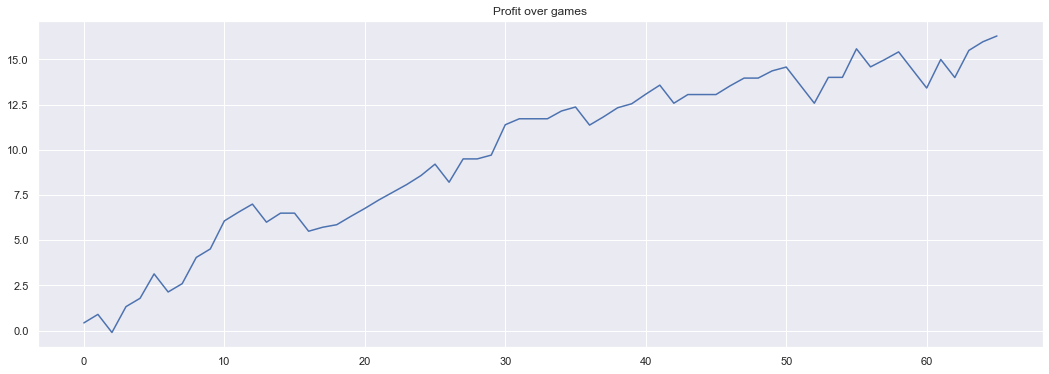

In [11]:
signals.graph_profit(signal)

In [13]:
signal.tail(10)

,event_id,minutes,total_corner,line,chl_hi,chl_low,line_entry,odd_change,peak,peak_change,signal,result_corner,league,actual_result,correct_prediction,return
0,20200218TUE13,2020-02-18 01:33:29,7,9.5,2.60,1.43,1.0,1.265487,1,0.9470,1,9.0,UE Champions,1,1,0.43
1,20200218TUE14,2020-02-18 01:30:59,5,7.5,2.48,1.47,1.0,1.267241,1,0.9545,1,6.0,UE Champions,1,1,0.47
2,20200218TUE18,2020-02-18 01:33:11,6,8.5,2.48,1.47,1.0,1.267241,1,1.0352,-1,8.0,South American Cup,1,0,-1.00
3,20200219WED1,2020-02-19 01:36:19,2,3.5,2.43,1.49,1.0,1.342342,1,1.0205,-1,7.0,League,-1,1,1.43
4,20200219WED3,2020-02-19 01:32:28,6,8.5,2.50,1.46,1.0,1.280702,1,0.9733,1,7.0,Eng Premier,1,1,0.46
5,20200219WED11,2020-02-19 01:31:04,7,9.5,2.35,1.52,1.0,1.288136,1,1.2459,-1,10.0,Copa Libertadores,-1,1,1.35
6,20200219WED16,2020-02-19 01:33:45,2,4.5,2.43,1.49,1.0,1.284483,1,0.9675,1,5.0,Central and North American Cup,-1,0,-1.00
7,20200220THU1,2020-02-20 01:32:49,7,9.5,2.50,1.46,1.0,1.269565,1,0.9542,1,9.0,UE Cup,1,1,0.46
8,20200220THU9,2020-02-20 01:31:55,5,7.5,2.45,1.48,1.0,1.275862,1,1.0803,-1,9.0,UE Cup,-1,1,1.45
9,20200220THU20,2020-02-20 01:34:58,12,14.5,2.48,1.47,1.0,1.278261,1,0.9545,1,13.0,South American Cup,1,1,0.47


In [16]:
signal[signal.event_id == '20200301SUN9']

,event_id,minutes,total_corner,line,chl_hi,chl_low,odd_change,peak,peak_change,signal,result_corner,league,correct_prediction,return
64,20200301SUN9,2020-03-01 01:33:36,5,8.5,2.33,1.53,1.254098,1,0.9745,1,7.0,German Division 1,1,0.53


### Baseline: buy low every time

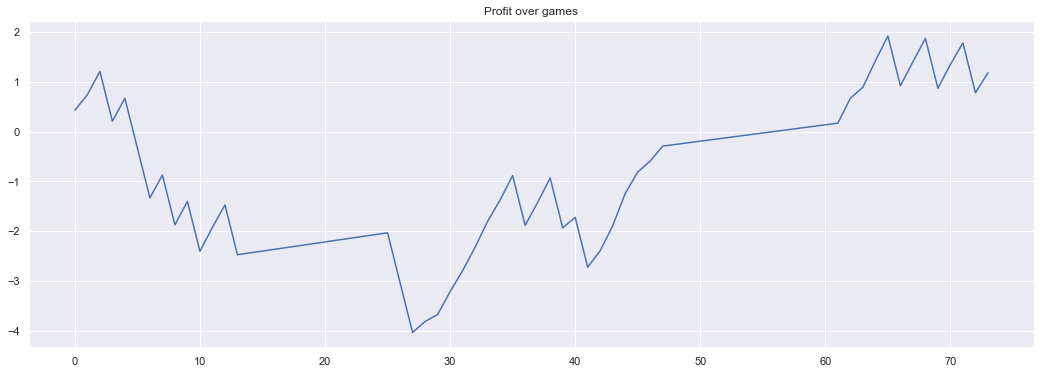

In [12]:
signal['signal'] = 1 # override
signal['correct_prediction'] = np.where(signal.signal == signal.actual_result, 1, 0)
signal['return'] = np.where(signal.correct_prediction == 1, signal.chl_low-1, -1 )
signals.graph_profit(signal)

### Looking at graphs of wrongly predicted games

In [9]:
wrong_predictions = signal[signal.correct_prediction == 0]# ['event_id']
wrong_predictions

,event_id,minutes,total_corner,line,chl_hi,chl_low,line_entry,odd_change,peak,peak_change,signal,result_corner,league,actual_result,correct_prediction,return
2,20200218TUE18,2020-02-18 01:33:11,6,8.5,2.48,1.47,1,1.267241,1,1.0352,-1,8.0,South American Cup,1,0,-1.0
5,20200219WED11,2020-02-19 01:31:04,7,9.5,2.35,1.52,1,1.288136,1,0.9744,1,10.0,Copa Libertadores,-1,0,-1.0
6,20200219WED16,2020-02-19 01:33:45,2,4.5,2.43,1.49,1,1.284483,1,0.9675,1,5.0,Central and North American Cup,-1,0,-1.0
10,20200220THU22,2020-02-20 01:33:18,15,18.5,2.55,1.45,1,1.178862,1,0.9177,1,20.0,Central and North American Cup,-1,0,-1.0
13,20200221FRI35,2020-02-21 01:33:07,7,9.5,2.45,1.48,1,1.275862,1,0.9610,1,11.0,Argentine Division 1,-1,0,-1.0
16,20200223SUN17,2020-02-23 01:37:39,7,8.5,2.60,1.43,1,1.265487,1,0.9533,1,9.0,Spanish Division 1,-1,0,-1.0
26,20200223SUN59,2020-02-23 01:33:09,7,9.5,2.50,1.46,1,1.269565,1,1.0282,-1,7.0,Mexican Premier,1,0,-1.0
42,20200301SUN17,2020-03-01 01:36:58,15,17.5,2.45,1.48,1,1.275862,1,0.9737,1,21.0,Eng Premier,-1,0,-1.0
49,20200301SUN53,2020-03-01 01:35:55,5,10.5,1.98,1.73,1,1.235714,1,1.1689,-1,9.0,US Football League,1,0,-1.0


### Prdiction result metrics

In [72]:
signal['actual_result'] = np.where(signal.result_corner > signal.line, 'hi', 'low')
signal[['event_id','signal','correct_prediction','actual_result']].groupby(['signal','correct_prediction','actual_result']).count().unstack().unstack()

event_id                
actual_result            hi       low      
correct_prediction        0    1    0     1
signal                                     
-1                      NaN  7.0  7.0   NaN
 1                     11.0  NaN  NaN  30.0

In [23]:
temp = signal[signal.signal == 0]
temp

,event_id,minutes,total_corner,line,chl_hi,chl_low,odd_change,peak,peak_change,signal,result_corner,league,correct_prediction,return,weekday
26,20200223SUN16,2020-02-23 01:36:13,3,5.5,2.43,1.49,1.273504,1,0.9868,0,6.0,Australian Division 1,None,0.0,SUN
39,20200225TUE16,2020-02-25 01:38:37,4,5.5,2.43,1.49,1.318584,1,1.0068,0,6.0,Copa Libertadores,None,0.0,TUE
43,20200227THU18,2020-02-27 01:31:57,4,6.5,2.40,1.50,1.282051,1,0.9934,0,5.0,South American Cup,None,0.0,THU
44,20200227THU20,2020-02-27 01:37:36,5,7.5,2.10,1.65,1.330645,1,1.0061,0,6.0,Central and North American Cup,None,0.0,THU
49,20200229SAT2,2020-02-29 01:33:50,7,10.5,2.33,1.53,1.243902,1,0.9871,0,11.0,Australian Division 1,None,0.0,SAT
68,20200301SUN24,2020-03-01 01:36:22,6,7.5,2.48,1.47,1.300885,1,0.9800,0,7.0,Spanish Division 1,None,0.0,SUN


In [56]:
temp = temp[['event_id','actual_result']].groupby(['actual_result']).count()

In [57]:
temp

,event_id
actual_result,
hi,6
low,10


### Plot one game

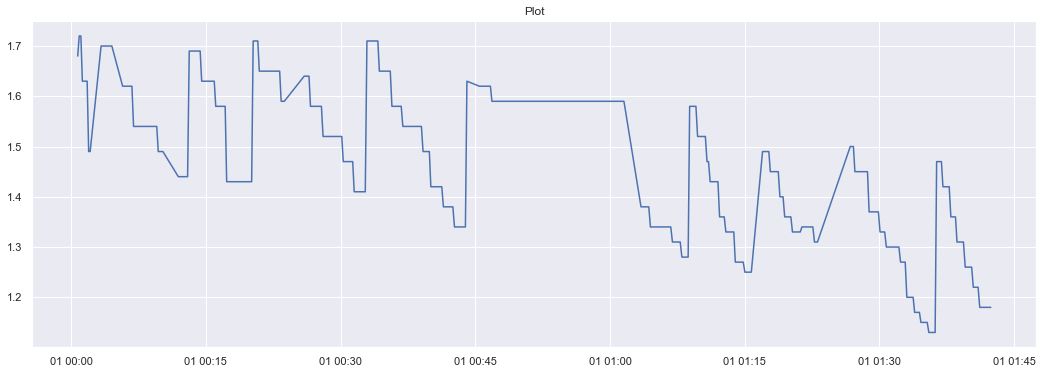

In [21]:
data = signals.signal_data_pipeline('20200301SUN24')
u.graph(data.minutes,data.chl_low,'Plot')

### chl_line change graph

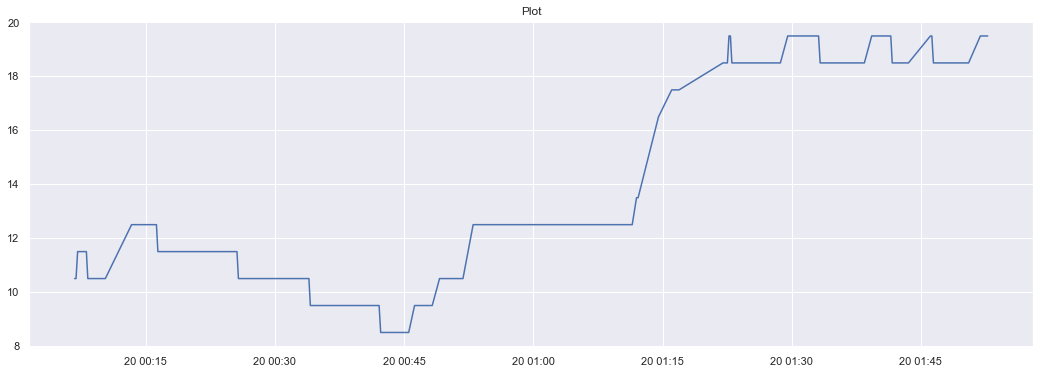

          event_id             minutes  total_corner  line  chl_hi  chl_low
0    20200220THU22 2020-02-20 00:06:45             0  10.5    2.02     1.70
1    20200220THU22 2020-02-20 00:06:55             0  10.5    2.02     1.70
2    20200220THU22 2020-02-20 00:07:06             0  11.5    2.60     1.43
3    20200220THU22 2020-02-20 00:07:06             0  11.5    2.60     1.43
4    20200220THU22 2020-02-20 00:07:16             0  11.5    2.60     1.43
..             ...                 ...           ...   ...     ...      ...
907  20200220THU22 2020-02-20 01:52:04            18  19.5    4.00     1.20
908  20200220THU22 2020-02-20 01:52:14            18  19.5    4.00     1.20
909  20200220THU22 2020-02-20 01:52:24            18  19.5    4.00     1.20
910  20200220THU22 2020-02-20 01:52:35            18  19.5    4.50     1.16
911  20200220THU22 2020-02-20 01:52:45            18  19.5    4.70     1.15

[912 rows x 6 columns]


In [25]:
data = signals.signal_data_pipeline('20200220THU22')
u.graph(data.minutes,data.line,'Plot')
print(data)

### Baseline model
Random bet on lowest chl_low at a specified t

In [37]:
def baseline_model(t):
    signal_list = None
    for event_id in [file[:-4] for file in os.listdir('data/') if '2020' in file]:
        # data pipeline
        data = signals.signal_data_pipeline(event_id)
        data = data[data.minutes >= datetime.combine(datetime.strptime(event_id[:8],"%Y%m%d"), t)]
        peaks = data
        if signal_list is None:
            if peaks.empty == False:
                signal_list = peaks.iloc[[0]]
        else:
            if peaks.empty == False:
                signal_list = pd.concat([signal_list, peaks.iloc[[0]]], ignore_index=True)

    # merge current results
    result = pd.read_csv('/Users/TysonWu/dev/odds-crawl-app/odds-crawl-app/development/result_collection/match_corner_result.csv')
    signal = signal_list.merge(result[['event_id', 'result_corner']], how='inner', on='event_id')

    # exclude games without results
    signal = signal[~signal.result_corner.isna()]

    # calculate return
    signal['correct_prediction'] = np.where(signals.line > signal.result_corner, 1, 0)
    signal['return'] = np.where(signal.correct_prediction == 1, signal.chl_low-1, -1)
    signal = signal.sort_values(by='event_id').reset_index(drop=True)
    return signal['return'].sum()

In [38]:
from tqdm import tqdm
from datetime import date

# timelist = [time(0,i,0) for i in range(60)] + [time(1,i,0) for i in range(36)]
timelist = [time(1,i,0) for i in range(36)]
pnl = []
for times in tqdm(timelist):
    profit = baseline_model(t=times)
    pnl.append(profit) # t takes datetime.time

u.graph([datetime.combine(date.today(), time)for time in timelist], pnl, 'Return against baseline at t')

  0%|          | 0/36 [00:07<?, ?it/s]


AttributeError: module 'signals' has no attribute 'line'

In [2]:
from datetime import datetime, time
import math
import signals
from tqdm import tqdm
import pandas as pd

# read and concat signal analysis data with different t restriction
df = None
t=[time(1,i,0) for i in range(0,35,5)]
for t in tqdm(t):
    temp = signals.signal_analysis(t)
    if df is None:
        df = temp
    else:
        df = pd.concat([df, temp])
df.reset_index(drop=True)

100%|██████████| 7/7 [00:34<00:00,  4.99s/it]


,event_id,minutes,total_corner,line,chl_hi,chl_low,odd_change,peak,peak_change,signal,result_corner,correct_prediction,return
0,20200218TUE13,2020-02-18 01:05:32,5,10.5,2.27,1.56,1.209302,1,1.0065,0,9.0,0,0.00
1,20200218TUE14,2020-02-18 01:11:48,3,7.5,2.17,1.61,1.238462,1,0.9938,0,6.0,0,0.00
2,20200218TUE18,2020-02-18 01:08:51,5,9.5,2.25,1.57,1.226562,1,1.1056,-1,8.0,0,-1.00
3,20200218TUE20,2020-02-18 01:03:40,5,11.5,2.95,1.34,1.022901,1,0.8481,1,11.0,1,0.34
4,20200219WED1,2020-02-19 01:07:51,1,5.5,2.38,1.51,1.217742,1,0.9557,1,7.0,0,-1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,20200222SAT18,2020-02-22 01:32:40,8,10.5,2.55,1.45,1.271930,1,0.9797,1,8.0,1,0.45
161,20200222SAT22,2020-02-22 01:31:06,12,15.5,3.60,1.24,1.008130,1,0.8158,1,14.0,1,0.24
162,20200222SAT52,2020-02-22 01:35:01,2,4.5,2.58,1.44,1.274336,1,0.9536,1,5.0,0,-1.00
163,20200222SAT6,2020-02-22 01:30:33,10,14.5,3.10,1.31,1.031496,1,0.8291,1,15.0,0,-1.00


## Misc

In [17]:
import pandas as pd
for event_id in tqdm([file[:-4] for file in os.listdir('data/') if '2020' in file]):
    df = pd.read_csv('data/{}.csv'.format(event_id))
    df['line_entry'] = '1'
    df.to_csv('data/{}.csv'.format(event_id))

100%|██████████| 78/78 [00:02<00:00, 30.91it/s]


In [8]:
data = signals.signal_data_pipeline('20200301SUN48_test')
data

In [10]:
peaks = signals.signal_rules('20200301SUN48', data, t=time(1,30,0), min_peak_change=0.98)
peaks

,event_id,minutes,total_corner,line,chl_hi,chl_low,line_entry,odd_change,peak,peak_change,signal
456,20200301SUN48,2020-03-01 01:33:58,10,13.5,2.40,1.50,1,1.250000,1,0.9804,0
524,20200301SUN48,2020-03-01 01:41:51,13,15.5,2.50,1.46,1,1.247863,1,0.9733,1
610,20200301SUN48,2020-03-01 01:49:37,13,14.5,2.43,1.49,1,1.342342,1,1.0205,-1


In [11]:
peaks = peaks[peaks['signal'] != 0]
peaks

,event_id,minutes,total_corner,line,chl_hi,chl_low,line_entry,odd_change,peak,peak_change,signal
524,20200301SUN48,2020-03-01 01:41:51,13,15.5,2.50,1.46,1,1.247863,1,0.9733,1
610,20200301SUN48,2020-03-01 01:49:37,13,14.5,2.43,1.49,1,1.342342,1,1.0205,-1


### Return line entry and hilow to make web element id

In [15]:
signal_row = peaks.iloc[[0]]
signal_row = signal_row.reset_index(drop=True)
line_entry = str(signal_row['line_entry'][0])
hilow = convert_hilow(signal_row['signal'][0])
line_entry+hilow

'1L'

In [14]:
def convert_hilow(num):
    if num == 1:
        return 'L'
    if num == -1:
        return 'H'
    else:
        return ''
if peaks.empty == False:
    signal_row = peaks.iloc[[0]]
    signal_row = signal_row.reset_index(drop=True)
    print(signal_row)
    entry = signal_row['line_entry'][0]
    print(entry)
    hilow = convert_hilow(signal_row['signal'][0])
    print(hilow)

        event_id             minutes  total_corner  line  chl_hi  chl_low  \
0  20200301SUN48 2020-03-01 01:41:51            13  15.5     2.5     1.46   

   line_entry  odd_change  peak  peak_change  signal  
0           1    1.247863     1       0.9733       1  
1
L


## Make column regarding to first half/haltime/second half for newer data

In [179]:
df = pd.read_csv('data/20200308SUN44.csv')
df['status'].unique()

def get_match_status(s):
    if 'Selling Time' in s:
        return 'pre'
    if '1st Half' in s:
        return '1st half'
    if 'Half Time' in s:
        return 'half time'
    if '2nd Half' in s:
        return '2nd half'
    else:
        return None

df['match_status'] = df['status'].apply(get_match_status)
df.head()

,event_id,timestamp,minutes,status,total_corner,home_score,away_score,home_odd,draw_odd,away_odd,nts_home,nts_no,nts_away,chl_line,chl_hi,chl_low,line_entry,match_status
0,20200308SUN44,2020-03-09 03:45:37,0:00:37,Match Status : 1st Half In Progress;Scoring In...,0,0,0,1.9,3.26,3.42,NaN,NaN,NaN,10.5,1.74,1.97,1.0,1st half
1,20200308SUN44,2020-03-09 03:45:37,0:00:37,Match Status : 1st Half In Progress;Scoring In...,0,0,0,1.9,3.26,3.42,NaN,NaN,NaN,11.5,2.15,1.62,2.0,1st half
2,20200308SUN44,2020-03-09 03:45:47,0:00:47,Match Status : 1st Half In Progress;Scoring In...,0,0,0,1.9,3.26,3.42,1.66,9.5,2.36,10.5,1.75,1.95,1.0,1st half
3,20200308SUN44,2020-03-09 03:45:47,0:00:47,Match Status : 1st Half In Progress;Scoring In...,0,0,0,1.9,3.26,3.42,1.66,9.5,2.36,11.5,2.15,1.62,2.0,1st half
4,20200308SUN44,2020-03-09 03:45:58,0:00:58,Match Status : 1st Half In Progress;Scoring In...,0,0,0,1.9,3.26,3.42,1.66,9.5,2.36,10.5,1.75,1.95,1.0,1st half


In [180]:
from datetime import datetime, time, timedelta
df['minutes_timestamp'] = df.minutes.apply(lambda x: datetime.combine(datetime.today(), datetime.strptime(x, "%H:%M:%S").time()))
# df['minutes'] = df.minutes.apply(lambda x: datetime.strptime(x, "%H:%M:%S").time())
status_change_time = df[['minutes_timestamp','match_status']].groupby('match_status').agg(['min','max'])
status_change_time.columns = status_change_time.columns.droplevel()
status_change_time['duration'] = status_change_time['max'] - status_change_time['min']
status_change_time

,min,max,duration
match_status,,,
1st half,2020-03-09 00:00:37,2020-03-09 00:52:54,00:52:17
2nd half,2020-03-09 01:01:49,2020-03-09 01:57:14,00:55:25
half time,2020-03-09 00:53:05,2020-03-09 01:01:39,00:08:34


In [181]:
status_change_dict = status_change_time.to_dict()
status_change_dict

{'min': {'1st half': Timestamp('2020-03-09 00:00:37'),
  '2nd half': Timestamp('2020-03-09 01:01:49'),
  'half time': Timestamp('2020-03-09 00:53:05')},
 'max': {'1st half': Timestamp('2020-03-09 00:52:54'),
  '2nd half': Timestamp('2020-03-09 01:57:14'),
  'half time': Timestamp('2020-03-09 01:01:39')},
 'duration': {'1st half': Timedelta('0 days 00:52:17'),
  '2nd half': Timedelta('0 days 00:55:25'),
  'half time': Timedelta('0 days 00:08:34')}}

In [182]:
def adjust_minute(status, minute):
    if status == 'pre':
        return status_change_dict['min']['pre']
    if status == '1st half':
        return min(minute - status_change_dict['duration']['pre'], datetime.combine(datetime.today(), time(0,45,0)))
    if status == 'half time':
        return datetime.combine(datetime.today(), time(0,45,0))
        #return status_change_dict['max']['1st half'] - status_change_dict['duration']['pre']
    if status == '2nd half':
        return min(minute - status_change_dict['duration']['pre'] - status_change_dict['duration']['half time'] - status_change_dict['duration']['1st half'] + timedelta(minutes=45), datetime.combine(datetime.today(), time(1,30,0)))

def adjust_minute_compensate(status, minute):
    if status == 'pre':
        return timedelta(minutes=0)
    if status == '1st half':
        time_left = datetime.combine(datetime.today(), time(0,45,0))-(minute - status_change_dict['duration']['pre']) # timedelta
        if time_left >= timedelta(minutes=0):
            return timedelta(minutes=0)
        else:
            return abs(time_left)
    if status == 'half time':
        return timedelta(minutes=0)
    if status == '2nd half':
        time_left = datetime.combine(datetime.today(), time(1,30,0)) - (minute - status_change_dict['duration']['pre'] - status_change_dict['duration']['half time'] - status_change_dict['duration']['1st half'] + timedelta(minutes=45))
        if time_left >= timedelta(minutes=0):
            return timedelta(minutes=0)
        else:
            return abs(time_left)
    
df['minute_adjusted'] = df.apply(lambda x: adjust_minute(x.match_status, x.minutes_timestamp).time(),axis=1)
df['minute_adjusted_compensate'] = df.apply(lambda x: adjust_minute_compensate(x.match_status, x.minutes_timestamp),axis=1)

KeyError: 'pre'